In [1]:
from numpy.random import seed
seed(99)

import os
import numpy as np
import pandas as pd

import gc
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.0.0.2:8470
REPLICAS:  8


In [2]:
FC_RESNET = np.load('../input/ranzcr-fc-tta-final/features_FC_RESNET.npy')
FC_RESNET_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_RESNET_TTA.npy')
FC_SERESNET = np.load('../input/ranzcr-fc-tta-final/features_FC_SERESNET.npy')
FC_SERESNET_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_SERESNET_TTA.npy')
FC_EFFNET = np.load('../input/ranzcr-fc-tta-mar16/RanzCR_FC-TTA_March16/features_FC_EFFNET.npy')
FC_EFFNET_TTA = np.load('../input/ranzcr-fc-tta-mar16/RanzCR_FC-TTA_March16/features_FC_EFFNET_TTA.npy')
FC_DENSNET = np.load('../input/ranzcr-fc-tta-mar16/RanzCR_FC-TTA_March16/features_FC_DENSNET.npy')
FC_DENSNET_TTA = np.load('../input/ranzcr-fc-tta-mar16/RanzCR_FC-TTA_March16/features_FC_DENSNET_TTA.npy')
FC_RESNET_UW1 = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW1.npy')
FC_RESNET_UW1_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW1_TTA.npy')
FC_RESNET_UW2 = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW2.npy')
FC_RESNET_UW2_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW2_TTA.npy')
FC_RESNET_UW3 = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW3.npy')
FC_RESNET_UW3_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW3_TTA.npy')
FC_RESNET_UW4 = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW4.npy')
FC_RESNET_UW4_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW4_TTA.npy')
FC_RESNET_UW5 = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW5.npy')
FC_RESNET_UW5_TTA = np.load('../input/ranzcr-fc-tta-final/features_FC_model_UW5_TTA.npy')

from sklearn.preprocessing import minmax_scale
FC_RESNET = minmax_scale(FC_RESNET, feature_range=(0,1))
FC_RESNET_TTA = minmax_scale(FC_RESNET_TTA, feature_range=(0,1))
FC_SERESNET = minmax_scale(FC_SERESNET, feature_range=(0,1))
FC_SERESNET_TTA = minmax_scale(FC_SERESNET_TTA, feature_range=(0,1))
FC_EFFNET = minmax_scale(FC_EFFNET, feature_range=(0,1))
FC_EFFNET_TTA = minmax_scale(FC_EFFNET_TTA, feature_range=(0,1))
FC_DENSNET = minmax_scale(FC_DENSNET, feature_range=(0,1))
FC_DENSNET_TTA = minmax_scale(FC_DENSNET_TTA, feature_range=(0,1))
FC_RESNET_UW1 = minmax_scale(FC_RESNET_UW1, feature_range=(0,1))
FC_RESNET_UW1_TTA = minmax_scale(FC_RESNET_UW1_TTA, feature_range=(0,1))
FC_RESNET_UW2 = minmax_scale(FC_RESNET_UW2, feature_range=(0,1))
FC_RESNET_UW2_TTA = minmax_scale(FC_RESNET_UW2_TTA, feature_range=(0,1))
FC_RESNET_UW3 = minmax_scale(FC_RESNET_UW3, feature_range=(0,1))
FC_RESNET_UW3_TTA = minmax_scale(FC_RESNET_UW3_TTA, feature_range=(0,1))
FC_RESNET_UW4 = minmax_scale(FC_RESNET_UW4, feature_range=(0,1))
FC_RESNET_UW4_TTA = minmax_scale(FC_RESNET_UW4_TTA, feature_range=(0,1))
FC_RESNET_UW5 = minmax_scale(FC_RESNET_UW5, feature_range=(0,1))
FC_RESNET_UW5_TTA = minmax_scale(FC_RESNET_UW5_TTA, feature_range=(0,1))

FC_ALL1 = np.hstack([FC_RESNET,FC_RESNET_TTA,FC_SERESNET,FC_SERESNET_TTA,FC_EFFNET,FC_EFFNET_TTA,FC_DENSNET,FC_DENSNET_TTA])
FC_ALL2 = np.hstack([FC_RESNET_UW1,FC_RESNET_UW1_TTA,FC_RESNET_UW2,FC_RESNET_UW2_TTA,FC_RESNET_UW3,FC_RESNET_UW3_TTA,FC_RESNET_UW4,FC_RESNET_UW4_TTA,FC_RESNET_UW5,FC_RESNET_UW5_TTA])
FC_ALL1 = pd.DataFrame(FC_ALL1)
FC_ALL2 = pd.DataFrame(FC_ALL2)

del FC_RESNET,FC_RESNET_TTA,FC_SERESNET,FC_SERESNET_TTA,FC_EFFNET,FC_EFFNET_TTA,FC_DENSNET,FC_DENSNET_TTA
del FC_RESNET_UW1,FC_RESNET_UW1_TTA,FC_RESNET_UW2,FC_RESNET_UW2_TTA,FC_RESNET_UW3,FC_RESNET_UW3_TTA,FC_RESNET_UW4,FC_RESNET_UW4_TTA,FC_RESNET_UW5,FC_RESNET_UW5_TTA

train = pd.read_csv('../input/ranzcr-clip-catheter-line-classification/train.csv')
dfx = pd.read_csv('../input/ranzcr-train-folds-metadata/train_folds.csv')

targets = [
    "ETT - Abnormal",
    "ETT - Borderline",
    "ETT - Normal",
    "NGT - Abnormal",
    "NGT - Borderline",
    "NGT - Incompletely Imaged",
    "NGT - Normal",
    "CVC - Abnormal",
    "CVC - Borderline",
    "CVC - Normal",
    "Swan Ganz Catheter Present",
]

In [3]:
from keras.models import Sequential
from keras.layers import Dense, MaxPool1D, Dropout, MaxPooling1D
from sklearn import metrics
from keras.optimizers import SGD, Adam

# get the model
def get_model1(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(1024, input_dim=n_inputs, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, input_dim=n_inputs, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_outputs, activation='sigmoid'))
    opt = Adam(lr=0.0000009)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['AUC'])
    return model

# get the model
def get_model2(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(1024, input_dim=n_inputs, kernel_initializer='glorot_uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(n_outputs, activation='sigmoid'))
    opt = Adam(lr=0.0000009)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['AUC'])
    return model
    


Epoch 00001: val_auc improved from -inf to 0.84561, saving model to FC1_fold_0.h5

Epoch 00002: val_auc improved from 0.84561 to 0.91547, saving model to FC1_fold_0.h5

Epoch 00003: val_auc improved from 0.91547 to 0.93952, saving model to FC1_fold_0.h5

Epoch 00004: val_auc improved from 0.93952 to 0.95020, saving model to FC1_fold_0.h5

Epoch 00005: val_auc improved from 0.95020 to 0.95765, saving model to FC1_fold_0.h5

Epoch 00006: val_auc improved from 0.95765 to 0.96367, saving model to FC1_fold_0.h5

Epoch 00007: val_auc improved from 0.96367 to 0.96862, saving model to FC1_fold_0.h5

Epoch 00008: val_auc improved from 0.96862 to 0.97259, saving model to FC1_fold_0.h5

Epoch 00009: val_auc improved from 0.97259 to 0.97555, saving model to FC1_fold_0.h5

Epoch 00010: val_auc improved from 0.97555 to 0.97795, saving model to FC1_fold_0.h5

Epoch 00011: val_auc improved from 0.97795 to 0.97976, saving model to FC1_fold_0.h5

Epoch 00012: val_auc improved from 0.97976 to 0.98132, s

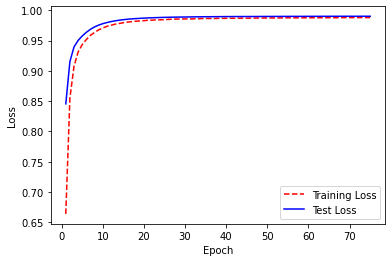


Epoch 00001: val_auc improved from -inf to 0.88783, saving model to FC2_fold_0.h5

Epoch 00002: val_auc improved from 0.88783 to 0.95887, saving model to FC2_fold_0.h5

Epoch 00003: val_auc improved from 0.95887 to 0.97141, saving model to FC2_fold_0.h5

Epoch 00004: val_auc improved from 0.97141 to 0.97843, saving model to FC2_fold_0.h5

Epoch 00005: val_auc improved from 0.97843 to 0.98280, saving model to FC2_fold_0.h5

Epoch 00006: val_auc improved from 0.98280 to 0.98549, saving model to FC2_fold_0.h5

Epoch 00007: val_auc improved from 0.98549 to 0.98723, saving model to FC2_fold_0.h5

Epoch 00008: val_auc improved from 0.98723 to 0.98837, saving model to FC2_fold_0.h5

Epoch 00009: val_auc improved from 0.98837 to 0.98925, saving model to FC2_fold_0.h5

Epoch 00010: val_auc improved from 0.98925 to 0.98991, saving model to FC2_fold_0.h5

Epoch 00011: val_auc improved from 0.98991 to 0.99047, saving model to FC2_fold_0.h5

Epoch 00012: val_auc improved from 0.99047 to 0.99083, s

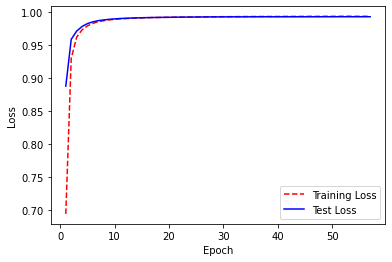

fold_0  auc is  0.984266271964379

Epoch 00001: val_auc improved from -inf to 0.88749, saving model to FC1_fold_1.h5

Epoch 00002: val_auc improved from 0.88749 to 0.92812, saving model to FC1_fold_1.h5

Epoch 00003: val_auc improved from 0.92812 to 0.94052, saving model to FC1_fold_1.h5

Epoch 00004: val_auc improved from 0.94052 to 0.94942, saving model to FC1_fold_1.h5

Epoch 00005: val_auc improved from 0.94942 to 0.95840, saving model to FC1_fold_1.h5

Epoch 00006: val_auc improved from 0.95840 to 0.96635, saving model to FC1_fold_1.h5

Epoch 00007: val_auc improved from 0.96635 to 0.97198, saving model to FC1_fold_1.h5

Epoch 00008: val_auc improved from 0.97198 to 0.97575, saving model to FC1_fold_1.h5

Epoch 00009: val_auc improved from 0.97575 to 0.97856, saving model to FC1_fold_1.h5

Epoch 00010: val_auc improved from 0.97856 to 0.98056, saving model to FC1_fold_1.h5

Epoch 00011: val_auc improved from 0.98056 to 0.98205, saving model to FC1_fold_1.h5

Epoch 00012: val_auc i

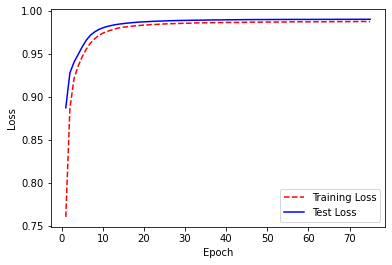


Epoch 00001: val_auc improved from -inf to 0.91248, saving model to FC2_fold_1.h5

Epoch 00002: val_auc improved from 0.91248 to 0.95389, saving model to FC2_fold_1.h5

Epoch 00003: val_auc improved from 0.95389 to 0.96819, saving model to FC2_fold_1.h5

Epoch 00004: val_auc improved from 0.96819 to 0.97599, saving model to FC2_fold_1.h5

Epoch 00005: val_auc improved from 0.97599 to 0.98061, saving model to FC2_fold_1.h5

Epoch 00006: val_auc improved from 0.98061 to 0.98380, saving model to FC2_fold_1.h5

Epoch 00007: val_auc improved from 0.98380 to 0.98597, saving model to FC2_fold_1.h5

Epoch 00008: val_auc improved from 0.98597 to 0.98746, saving model to FC2_fold_1.h5

Epoch 00009: val_auc improved from 0.98746 to 0.98872, saving model to FC2_fold_1.h5

Epoch 00010: val_auc improved from 0.98872 to 0.98965, saving model to FC2_fold_1.h5

Epoch 00011: val_auc improved from 0.98965 to 0.99034, saving model to FC2_fold_1.h5

Epoch 00012: val_auc improved from 0.99034 to 0.99092, s

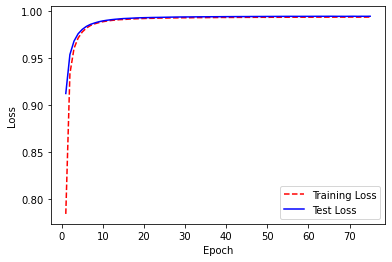

fold_1  auc is  0.9861967282483579

Epoch 00001: val_auc improved from -inf to 0.83969, saving model to FC1_fold_2.h5

Epoch 00002: val_auc improved from 0.83969 to 0.92965, saving model to FC1_fold_2.h5

Epoch 00003: val_auc improved from 0.92965 to 0.94639, saving model to FC1_fold_2.h5

Epoch 00004: val_auc improved from 0.94639 to 0.95498, saving model to FC1_fold_2.h5

Epoch 00005: val_auc improved from 0.95498 to 0.96176, saving model to FC1_fold_2.h5

Epoch 00006: val_auc improved from 0.96176 to 0.96770, saving model to FC1_fold_2.h5

Epoch 00007: val_auc improved from 0.96770 to 0.97235, saving model to FC1_fold_2.h5

Epoch 00008: val_auc improved from 0.97235 to 0.97592, saving model to FC1_fold_2.h5

Epoch 00009: val_auc improved from 0.97592 to 0.97866, saving model to FC1_fold_2.h5

Epoch 00010: val_auc improved from 0.97866 to 0.98062, saving model to FC1_fold_2.h5

Epoch 00011: val_auc improved from 0.98062 to 0.98226, saving model to FC1_fold_2.h5

Epoch 00012: val_auc 

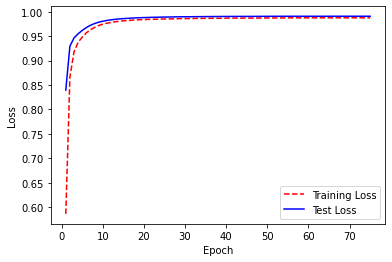


Epoch 00001: val_auc improved from -inf to 0.91818, saving model to FC2_fold_2.h5

Epoch 00002: val_auc improved from 0.91818 to 0.95388, saving model to FC2_fold_2.h5

Epoch 00003: val_auc improved from 0.95388 to 0.96916, saving model to FC2_fold_2.h5

Epoch 00004: val_auc improved from 0.96916 to 0.97688, saving model to FC2_fold_2.h5

Epoch 00005: val_auc improved from 0.97688 to 0.98150, saving model to FC2_fold_2.h5

Epoch 00006: val_auc improved from 0.98150 to 0.98407, saving model to FC2_fold_2.h5

Epoch 00007: val_auc improved from 0.98407 to 0.98581, saving model to FC2_fold_2.h5

Epoch 00008: val_auc improved from 0.98581 to 0.98695, saving model to FC2_fold_2.h5

Epoch 00009: val_auc improved from 0.98695 to 0.98797, saving model to FC2_fold_2.h5

Epoch 00010: val_auc improved from 0.98797 to 0.98862, saving model to FC2_fold_2.h5

Epoch 00011: val_auc improved from 0.98862 to 0.98911, saving model to FC2_fold_2.h5

Epoch 00012: val_auc improved from 0.98911 to 0.98960, s

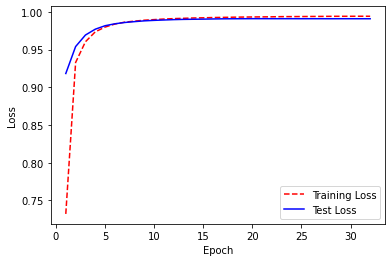

fold_2  auc is  0.9828788677974155

Epoch 00001: val_auc improved from -inf to 0.87940, saving model to FC1_fold_3.h5

Epoch 00002: val_auc improved from 0.87940 to 0.92650, saving model to FC1_fold_3.h5

Epoch 00003: val_auc improved from 0.92650 to 0.94024, saving model to FC1_fold_3.h5

Epoch 00004: val_auc improved from 0.94024 to 0.94754, saving model to FC1_fold_3.h5

Epoch 00005: val_auc improved from 0.94754 to 0.95400, saving model to FC1_fold_3.h5

Epoch 00006: val_auc improved from 0.95400 to 0.96036, saving model to FC1_fold_3.h5

Epoch 00007: val_auc improved from 0.96036 to 0.96592, saving model to FC1_fold_3.h5

Epoch 00008: val_auc improved from 0.96592 to 0.97030, saving model to FC1_fold_3.h5

Epoch 00009: val_auc improved from 0.97030 to 0.97359, saving model to FC1_fold_3.h5

Epoch 00010: val_auc improved from 0.97359 to 0.97604, saving model to FC1_fold_3.h5

Epoch 00011: val_auc improved from 0.97604 to 0.97785, saving model to FC1_fold_3.h5

Epoch 00012: val_auc 

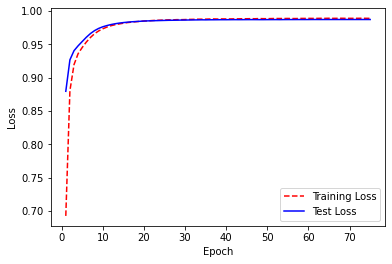


Epoch 00001: val_auc improved from -inf to 0.92185, saving model to FC2_fold_3.h5

Epoch 00002: val_auc improved from 0.92185 to 0.96000, saving model to FC2_fold_3.h5

Epoch 00003: val_auc improved from 0.96000 to 0.97229, saving model to FC2_fold_3.h5

Epoch 00004: val_auc improved from 0.97229 to 0.97951, saving model to FC2_fold_3.h5

Epoch 00005: val_auc improved from 0.97951 to 0.98390, saving model to FC2_fold_3.h5

Epoch 00006: val_auc improved from 0.98390 to 0.98664, saving model to FC2_fold_3.h5

Epoch 00007: val_auc improved from 0.98664 to 0.98831, saving model to FC2_fold_3.h5

Epoch 00008: val_auc improved from 0.98831 to 0.98954, saving model to FC2_fold_3.h5

Epoch 00009: val_auc improved from 0.98954 to 0.99035, saving model to FC2_fold_3.h5

Epoch 00010: val_auc improved from 0.99035 to 0.99099, saving model to FC2_fold_3.h5

Epoch 00011: val_auc improved from 0.99099 to 0.99143, saving model to FC2_fold_3.h5

Epoch 00012: val_auc improved from 0.99143 to 0.99187, s

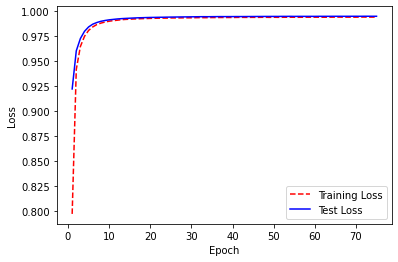

fold_3  auc is  0.9842821559678139

Epoch 00001: val_auc improved from -inf to 0.83017, saving model to FC1_fold_4.h5

Epoch 00002: val_auc improved from 0.83017 to 0.92031, saving model to FC1_fold_4.h5

Epoch 00003: val_auc improved from 0.92031 to 0.94776, saving model to FC1_fold_4.h5

Epoch 00004: val_auc improved from 0.94776 to 0.95707, saving model to FC1_fold_4.h5

Epoch 00005: val_auc improved from 0.95707 to 0.96330, saving model to FC1_fold_4.h5

Epoch 00006: val_auc improved from 0.96330 to 0.96852, saving model to FC1_fold_4.h5

Epoch 00007: val_auc improved from 0.96852 to 0.97228, saving model to FC1_fold_4.h5

Epoch 00008: val_auc improved from 0.97228 to 0.97523, saving model to FC1_fold_4.h5

Epoch 00009: val_auc improved from 0.97523 to 0.97757, saving model to FC1_fold_4.h5

Epoch 00010: val_auc improved from 0.97757 to 0.97936, saving model to FC1_fold_4.h5

Epoch 00011: val_auc improved from 0.97936 to 0.98077, saving model to FC1_fold_4.h5

Epoch 00012: val_auc 

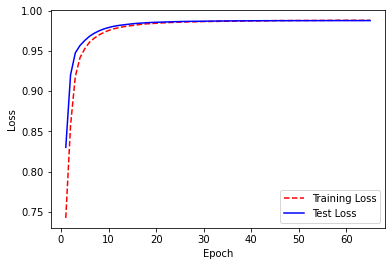


Epoch 00001: val_auc improved from -inf to 0.91221, saving model to FC2_fold_4.h5

Epoch 00002: val_auc improved from 0.91221 to 0.95134, saving model to FC2_fold_4.h5

Epoch 00003: val_auc improved from 0.95134 to 0.96740, saving model to FC2_fold_4.h5

Epoch 00004: val_auc improved from 0.96740 to 0.97671, saving model to FC2_fold_4.h5

Epoch 00005: val_auc improved from 0.97671 to 0.98180, saving model to FC2_fold_4.h5

Epoch 00006: val_auc improved from 0.98180 to 0.98494, saving model to FC2_fold_4.h5

Epoch 00007: val_auc improved from 0.98494 to 0.98699, saving model to FC2_fold_4.h5

Epoch 00008: val_auc improved from 0.98699 to 0.98830, saving model to FC2_fold_4.h5

Epoch 00009: val_auc improved from 0.98830 to 0.98929, saving model to FC2_fold_4.h5

Epoch 00010: val_auc improved from 0.98929 to 0.98997, saving model to FC2_fold_4.h5

Epoch 00011: val_auc improved from 0.98997 to 0.99050, saving model to FC2_fold_4.h5

Epoch 00012: val_auc improved from 0.99050 to 0.99090, s

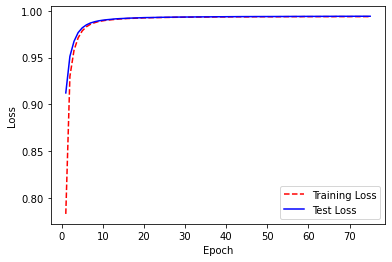

fold_4  auc is  0.9843244749360376


In [4]:
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint


fullscoreset=[]
n_fold=5
for zzz in range(n_fold):
    current_fold = zzz
    foldidx = dfx.index[dfx.fold != current_fold].tolist()
    df_train = FC_ALL1.iloc[foldidx]
    train_targets = dfx[dfx.fold != current_fold].reset_index(drop=True)[targets]

    foldidx = dfx.index[dfx.fold == current_fold].tolist()
    df_test = FC_ALL1.iloc[foldidx]
    test_targets = dfx[dfx.fold == current_fold].reset_index(drop=True)[targets]                    

    #==================================================================================
    n_inputs, n_outputs = df_train.shape[1], train_targets.shape[1]
    # get model
    model = get_model1(n_inputs, n_outputs)

    filepath = 'FC1_fold_' + str(zzz) +  '.h5'
    checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

    earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, epsilon=1e-4, mode='min')

    # fit the model on all data
    history = model.fit(df_train.values, train_targets.values, validation_data=(df_test.values, test_targets.values), callbacks=[earlyStopping, reduce_lr_loss, checkpoint], verbose=0, epochs=75, steps_per_epoch=50)
    # Get training and test loss histories
    training_loss = history.history['auc']
    test_loss = history.history['val_auc']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
    #==========================================================================================
    preds1 = model.predict(df_test.values)
    
    del model
    #===========================================================
    foldidx = dfx.index[dfx.fold != current_fold].tolist()
    df_train = FC_ALL2.iloc[foldidx]
    train_targets = dfx[dfx.fold != current_fold].reset_index(drop=True)[targets]

    foldidx = dfx.index[dfx.fold == current_fold].tolist()
    df_test = FC_ALL2.iloc[foldidx]
    test_targets = dfx[dfx.fold == current_fold].reset_index(drop=True)[targets]                    

     #================================================================ 
    n_inputs, n_outputs = df_train.shape[1], train_targets.shape[1]
    # get model
    model = get_model2(n_inputs, n_outputs)

    filepath = 'FC2_fold_' + str(zzz) +  '.h5'
    checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

    earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')
    reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, epsilon=1e-4, mode='min')

    # fit the model on all data
    history = model.fit(df_train.values, train_targets.values, validation_data=(df_test.values, test_targets.values), callbacks=[earlyStopping,reduce_lr_loss,checkpoint], verbose=0, epochs=75, steps_per_epoch=50)
    # Get training and test loss histories
    training_loss = history.history['auc']
    test_loss = history.history['val_auc']

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    # Visualize loss history
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show();
    #======================================================================
    preds2 = model.predict(df_test.values)
    del model
    

    preds = (preds1 + preds2)/2.0 
    
    #For multicolumn preds use below code
    score=0
    for i in range(test_targets.shape[1]):
        score=score + (metrics.roc_auc_score(test_targets.values[:,i], preds[:,i]))
        
    #score = metrics.roc_auc_score(np.asarray(test_targets['CVC - Borderline'].values), preds)
    #print(score)
    fullscoreset.append(score/test_targets.shape[1])
    #fullscoreset.append(score)

    print( 'fold_' + str(zzz) + '  auc is ', score/test_targets.shape[1])
    # save the model to disk
    #filename = 'NN_fold_' + str(zzz) +  '.h5'
    #model.save(filename)

In [5]:
fullscoreset=np.asarray(fullscoreset)
np.mean(fullscoreset)

0.9843896997828008